## 문제 1

### Labeled Faces in Wild 얼굴 이미지 사진에 대해 다음 코드와 같이 데이터를 설정한 뒤, 다음 조건을 만족하는 분류 모형을 만들고 평가하세요.

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.cross_validation import train_test_split

lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.5)
X = lfw_people.data
y = lfw_people.target

print(lfw_people.images[0].shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

(62, 47)


#### 1. 컴포넌트가 100개인 PCA와 slack variable weight C=1000인 서포트 벡터 머신을 파이프라인으로 연결하여 분류 모형을 만드세요.
#### 2. X_train, y_train 데이터로 분류 모형을 fitting 하고 X_test, y_test 데이터로 성능을 평가하세요.(classification_report사용)

In [2]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
model = Pipeline([('pca', PCA(n_components=100)), ('svc', SVC(kernel='linear', C=1000))])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))
print(confusion_matrix(y_test, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.77      0.69        13
     Colin Powell       0.83      0.80      0.82        50
  Donald Rumsfeld       0.61      0.85      0.71        20
    George W Bush       0.87      0.84      0.85       118
Gerhard Schroeder       0.59      0.53      0.56        19
      Hugo Chavez       0.77      0.77      0.77        13
   Jacques Chirac       0.25      0.17      0.20         6
    Jean Chretien       0.80      0.67      0.73        12
    John Ashcroft       1.00      0.75      0.86         8
Junichiro Koizumi       1.00      0.93      0.97        15
  Serena Williams       0.82      0.90      0.86        10
       Tony Blair       0.55      0.61      0.58        28

      avg / total       0.78      0.77      0.77       312

[[10  0  0  1  0  0  0  1  0  0  1  0]
 [ 3 40  1  3  0  0  1  0  0  0  1  1]
 [ 1  0 17  1  0  0  0  0  0  0  0  1]
 [ 0  5  4 99  2  1  1  0  0  0  0  6]
 [ 0  0  2  1 1

#### 3. RBF커널을 사용한 경우에 최적의 gamma 값을 찾아보세요.

In [4]:
model = Pipeline([('pca', PCA(n_components=100)),   #PCA는 성능이 더 좋아지기 힘들다.
                 ('svc', SVC(kernel='rbf', C=1000, gamma=0.00000009))]) #C가 너무 커서 엄청나게 오버피팅이 일어난 상태. 그래서 1/10씩 줄이기
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))
print(confusion_matrix(y_test, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.85      0.73        13
     Colin Powell       0.88      0.84      0.86        50
  Donald Rumsfeld       0.74      0.85      0.79        20
    George W Bush       0.87      0.89      0.88       118
Gerhard Schroeder       0.74      0.74      0.74        19
      Hugo Chavez       0.75      0.69      0.72        13
   Jacques Chirac       0.00      0.00      0.00         6
    Jean Chretien       0.80      0.67      0.73        12
    John Ashcroft       1.00      0.75      0.86         8
Junichiro Koizumi       0.93      0.93      0.93        15
  Serena Williams       0.90      0.90      0.90        10
       Tony Blair       0.69      0.71      0.70        28

      avg / total       0.81      0.82      0.81       312

[[ 11   0   0   0   0   0   0   1   0   0   1   0]
 [  3  42   0   3   0   1   0   0   0   0   0   1]
 [  1   0  17   1   0   0   0   0   0   0   0   1]
 [  0   3   3 105 

번외로 PCA가 없을 때 성능이 더 올라가는 경우 증명

In [5]:
model = SVC(kernel='rbf', C=1000, gamma=0.00000009)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))
print(confusion_matrix(y_test, y_pred))

                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.77      0.77        13
     Colin Powell       0.88      0.90      0.89        50
  Donald Rumsfeld       0.71      0.85      0.77        20
    George W Bush       0.88      0.92      0.90       118
Gerhard Schroeder       0.94      0.84      0.89        19
      Hugo Chavez       0.90      0.69      0.78        13
   Jacques Chirac       0.33      0.17      0.22         6
    Jean Chretien       0.80      0.67      0.73        12
    John Ashcroft       1.00      0.75      0.86         8
Junichiro Koizumi       0.93      0.93      0.93        15
  Serena Williams       0.90      0.90      0.90        10
       Tony Blair       0.73      0.79      0.76        28

      avg / total       0.85      0.85      0.85       312

[[ 10   0   0   1   0   0   0   1   0   0   1   0]
 [  0  45   0   3   0   0   1   0   0   0   0   1]
 [  1   0  17   1   0   0   0   0   0   0   0   1]
 [  0   3   2 108 

## 문제 2

### 문제 1과 같은 데이터에 대해 랜덤 포레스트 모형을 사용하여 분류 작업을 실행하고 다음 그림과 같이 가장 영향력이 큰 픽셀 10개의 위치를 표시하세요.

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))
print(confusion_matrix(y_test, y_pred))
#0.63이어도 0.5 이상이기만 하면 RF의 성능은 쓸만한 것으로 평가된다.

NameError: name 'X_train' is not defined

In [8]:
a = [1,2,3,4,5,6,7]

In [9]:
np.argsort(a)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [10]:
np.argsort(a)[::-1][:5]

array([6, 5, 4, 3, 2], dtype=int64)

In [11]:
ids = np.argsort(model.feature_importances_)[::-1][:10]   #argsort는 가장 작은 것부터 큰 것 순서대로 나오게 된다.
zip(ids % 47, ids // 47)   # %는 나머지 이고, //는 몫이다.

In [12]:
ids

array([ 92,  45,  48,  94, 329,  47, 470,  46,  91, 972], dtype=int64)

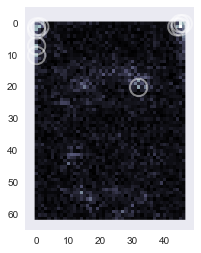

In [13]:
importances = model.feature_importances_.reshape((62, 47))
plt.imshow(importances, interpolation="nearest", cmap=plt.cm.bone)
plt.scatter(ids % 47, ids // 47, facecolors='none', edgecolors='w', linewidths=2, s=300, alpha=0.5)
plt.grid(False)
plt.show()